In [1]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
data_promo={
    'Experience_Years':[2,4,5,3,6,5],
    'Performance_Rating':[3,4,5,3,4,4],
    'Promoted':['No','Yes','Yes','No','Yes',None]
}
df_promo=pd.DataFrame(data_promo)
print('Dataset:')
display(df_promo)

Dataset:


,Experience_Years,Performance_Rating,Promoted
0,2,3,No
1,4,4,Yes
2,5,5,Yes
3,3,3,No
4,6,4,Yes
5,5,4,None


In [33]:
# cleam the data 
train_df=df_promo.dropna()

In [34]:
train_df

,Experience_Years,Performance_Rating,Promoted
0,2,3,No
1,4,4,Yes
2,5,5,Yes
3,3,3,No
4,6,4,Yes


In [40]:
# split data find out input and output
x=train_df[['Experience_Years','Performance_Rating']]
y=train_df['Promoted']

In [41]:
# create the model
model=DecisionTreeClassifier()

In [42]:
# train the model
model.fit(x,y)

DecisionTreeClassifier()

In [43]:
# predict
pred=model.predict([[5,4]])
print('Promotion prediction:', pred[0])

Promotion prediction: Yes


C:\Users\User\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


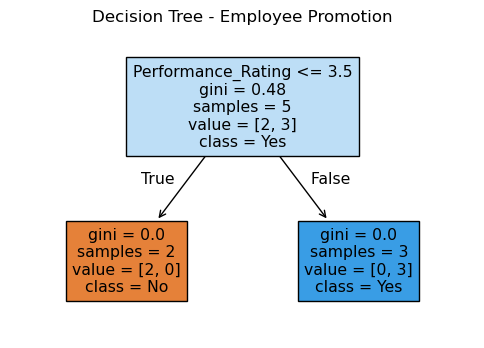

In [44]:
plt.figure(figsize=(6,4))
plot_tree(model,
          feature_names=['Experience_Years','Performance_Rating'],
          class_names=['No','Yes'],
          filled=True)
plt.title('Decision Tree - Employee Promotion')
plt.show()

# EXERCISE 1
    - Take the experience years and performance rating from user and display promoted or not promoted using prediction.
    - Write code in this way, there shouldbe no warning message.

# EXAMPLE 2
    - on DecisionTreeClassifier

In [73]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import matplotlib.pyplot as plt

In [68]:
data={'Age':[25,30,45,35,22,40,50],
      'Income':['Low','Medium','High','Medium','Low','High','High'],
      'Buy':['No','No','Yes','Yes','No','Yes','Yes']
}
df=pd.DataFrame(data)
print('Dataset:')
display(df)

Dataset:


,Age,Income,Buy
0,25,Low,No
1,30,Medium,No
2,45,High,Yes
3,35,Medium,Yes
4,22,Low,No
5,40,High,Yes
6,50,High,Yes


In [76]:
encoder=OneHotEncoder(sparse_output=False)
income_encoded=encoder.fit_transform(df[['Income']])
income_encoded_df=pd.DataFrame(income_encoded,columns=encoder.get_feature_names_out(['Income']))
income_encoded_df

,Income_High,Income_Low,Income_Medium
0,0.0,1.0,0.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,0.0,0.0,1.0
4,0.0,1.0,0.0
5,1.0,0.0,0.0
6,1.0,0.0,0.0


In [78]:
label_encoder=LabelEncoder()
df['Buy']=label_encoder.fit_transform(df['Buy'])
df['Buy']

0    0
1    0
2    1
3    1
4    0
5    1
6    1
Name: Buy, dtype: int64

In [80]:
df_encoded=pd.concat([df[['Age','Buy']],income_encoded_df], axis=1)    
df_encoded

#axis=0 → means work down the rows (top to bottom)
#axis=1 → means work across the columns (left to right)

,Age,Buy,Income_High,Income_Low,Income_Medium
0,25,0,0.0,1.0,0.0
1,30,0,0.0,0.0,1.0
2,45,1,1.0,0.0,0.0
3,35,1,0.0,0.0,1.0
4,22,0,0.0,1.0,0.0
5,40,1,1.0,0.0,0.0
6,50,1,1.0,0.0,0.0


In [83]:
# split data
x=df_encoded.drop('Buy',axis=1)
y=df_encoded['Buy']
x,y

(   Age  Income_High  Income_Low  Income_Medium
 0   25          0.0         1.0            0.0
 1   30          0.0         0.0            1.0
 2   45          1.0         0.0            0.0
 3   35          0.0         0.0            1.0
 4   22          0.0         1.0            0.0
 5   40          1.0         0.0            0.0
 6   50          1.0         0.0            0.0,
 0    0
 1    0
 2    1
 3    1
 4    0
 5    1
 6    1
 Name: Buy, dtype: int64)

In [84]:
# create the model
model=DecisionTreeClassifier()

In [85]:
# train the model
model.fit(x,y)

DecisionTreeClassifier()

In [86]:
sample=pd.DataFrame({'Age':[28],'Income':['Medium']})
sample_encoded=encoder.transform(sample[['Income']])     #encoder.transform() converts “Medium” into something like:[[0, 1, 0]]

sample_encoded_df=pd.DataFrame(sample_encoded, columns=encoder.get_feature_names_out(['Income']))  #urning that encoded array into a DataFrame, with proper column names.

sample_final=pd.concat([sample[['Age']], sample_encoded_df],axis=1)   #combining the original Age column with the new encoded income columns (side by side).

prediction=model.predict(sample_final)
predicted_label=label_encoder.inverse_transform(prediction)     #converts the numeric prediction back to the original category (like “Promoted” or “Not Promoted”).

print('Prediction for Age=28, Income=Medium', predicted_label[0])

Prediction for Age=28, Income=Medium No


In [98]:
person_age=int(input('Enter Age:'))
person_income=input('Enter category Low,Medium,High:\t')
person=pd.DataFrame({'Age':[person_age],'Income':[person_income]})
person_encoded=encoder.transform(person[['Income']])
person_encoded_df=pd.DataFrame(person_encoded, columns=encoder.get_feature_names_out(['Income']))
person_final=pd.concat([person[['Age']], person_encoded_df],axis=1)
prediction=model.predict(person_final)
predicted_label=label_encoder.inverse_transform(prediction)
print(f'Prediction for Age={person_age}, Income={person_income}', predicted_label[0])

Enter Age: 23
Enter category Low,Medium,High:	 Low


Prediction for Age=23, Income=Low No


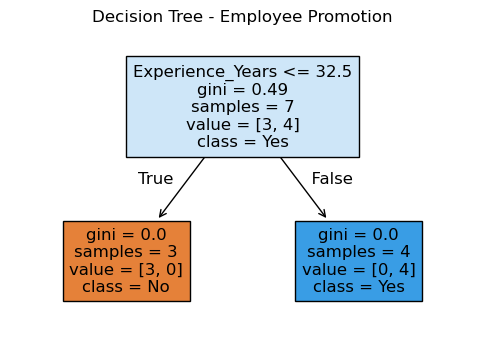

In [94]:
plt.figure(figsize=(6,4))
plot_tree(model,feature_names=X.columns, class_names=['No','Yes'],filled=True)
plt.title('Decision Tree - Employee Promotion')
plt.show() 